# Hangman

Steps: 
- Ask player if they want to play
- Randomly choose word from file
- Work out number of letters and display blank for each, plus start image
- Ask for player guess, check if in alphabet/ already entered
- Whenever wrong, change image displayed
- Whenever correct, display correct character
- Either lose or win
- Ask if want to play again

In [1]:
from random import randint
from IPython.display import clear_output
%matplotlib inline 
import matplotlib.pyplot as plt 
from PIL import Image

def wordchoice():
    wordlist=[]
    with open("wordlist.txt", "r") as file:
        for line in file:
            if line != '\n':
                line_list=line.strip()
            wordlist.append(line_list)
    
    total = len(wordlist)    
    index = randint(0,total-1)
    word_result = wordlist[index].lower()
    return word_result

In [2]:
def image_show(index):
    img = Image.open(f"./hangman/{index}.jpg")
    ax = plt.imshow(img)
    plt.axis('off')
    return ax

In [3]:
def player_input():
    valid = False
    while valid == False:
        guess = input('Enter a letter: ').lower()
        if len(guess)== 1 and guess in 'abcdefghijklmnopqrstuvwxyz':
            valid = True
            return guess
        else:
            print('Please enter one character from the alphabet')
            continue

In [4]:
def player_guess(hiddenword, guess):
    return guess in list(hiddenword)

In [7]:
def game_play():
    
    #setting up the word choice and console output
    word = wordchoice()
    hiddenlist = list(word)
    visiblelist = ['_ ' for i in hiddenlist]
    
    errors = 0
    errorlist = []
    output = ''.join(visiblelist)
    print(output)
    image_show(errors)
    plt.show()
    
    while ('_ ' in visiblelist) and (errors < 10):
    #get valid guess from player and see if it's a match
        my_guess = player_input()
        guess_status = player_guess(hiddenlist, my_guess)
    
    #update the output
        if guess_status:
            visiblelist = [(j+' ') if j == my_guess else i for (i,j) in zip(visiblelist,hiddenlist)]
        else:
            errors += 1
            errorlist.append(my_guess)
            
        clear_output(wait=True)
        output = ''.join(visiblelist)
        print(output)
        print(f'Errors: {errors}')
        error_output = ', '.join(errorlist)
        print(f'Your incorrect guesses: {error_output}')
        image_show(errors)
        plt.show()
        continue
            
    if '_ ' not in visiblelist:
        print('You won!')
    elif errors == 10:
        print('You lose!')
        print(f'The correct word was: {word}')
    else:
        print('Error')

t u n e 
Errors: 9
Your incorrect guesses: i, a, f, r, m, s, a, m, i


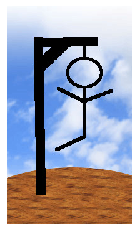

You won!


In [8]:
game_play()